In [276]:
pip install opendatasets

In [277]:
import opendatasets as od
od.version()

'0.1.22'

In [278]:
od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [279]:
import os

In [280]:
os.listdir("./weather-dataset-rattle-package")

['weatherAUS.csv']

In [281]:
import pandas as pd
import numpy as np

In [282]:
dataset="./weather-dataset-rattle-package"+"/weatherAUS.csv"

In [283]:
df=pd.read_csv(dataset)

In [284]:
df.shape

(145460, 23)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [286]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [288]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [289]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)

In [290]:
px.histogram(df,x='Location',title="Distribution of Locations",color='RainToday')

In [291]:
px.histogram(df,x='Temp3pm',title='Distribution of temp at 3pm',color='RainTomorrow')

In [292]:

px.histogram(df,x='RainToday',title='Distribution of Rain today vs rain Tomorrow',color='RainTomorrow')

In [293]:
px.scatter(df,x='MinTemp',y='MaxTemp',color='RainTomorrow')

In [294]:
px.scatter(df,x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

In [295]:
px.histogram(df,x='Sunshine',color='RainToday')

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [298]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(84471, 23)
(28158, 23)
(28158, 23)


In [302]:
year=pd.to_datetime(df.Date).dt.year

In [303]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [307]:
input_cols=list(df.columns)[1:-1]
target_col='RainTomorrow'

In [308]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [309]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [310]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [311]:
df['WindGustDir'].nunique()

16

In [312]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]

In [313]:
catogoric_columns=train_inputs.select_dtypes('object').columns.tolist()

In [314]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000  
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126  
std        7.072510      6.997072      2.866634      2.693370      6.404586  
min      980.500000    979.000000      0.000000      0.000000     -5.900000  
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000  
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000  
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000  
max     1041.000000   1039.600000      9.000000      9.000000     40.200000

In [315]:
train_inputs[catogoric_columns].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [316]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

In [317]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [318]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [319]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639])

In [320]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [321]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:

scaler=MinMaxScaler()

In [324]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [325]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2])

In [326]:
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2])

In [327]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [328]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W       0.294574          W        WNW      0.153846   
1              WNW       0.294574        NNW        WSW      0.030769   
2              WSW       0.310078          W        WSW      0.146154   
3               NE       0.139535         SE          E      0.084615   
4                W       0.271318        ENE         NW      0.053846   
...            ...            ...        ...        ...           ...   
144548         SSE       0.286822        ESE        SSE      0.184615   
144549          NE       0.193798        ENE         SW      0.146154   
144550         ESE       0.255814        ESE        SSE      0.200000   
144551         ESE       0.286822        ESE        SSW      0.215385   
144552         WNW       0.542636        ENE        SSW      0.230769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.449587       0.4800   
1           0.252874         0.44         0.25     0.497521       0.4912   
2           0.298851         0.38         0.30     0.447934       0.5056   
3           0.103448         0.45         0.16     0.613223       0.5712   
4           0.229885         0.82         0.33     0.500826       0.4624   
...              ...          ...          ...          ...          ...   
144548      0.298851         0.22         0.13     0.555372       0.5232   
144549      0.229885         0.16         0.08     0.530579       0.4880   
144550      0.103448         0.15         0.08     0.519008       0.4944   
144551      0.195402         0.22         0.09     0.553719       0.5136   
144552      0.149425         0.16         0.09     0.522314       0.4656   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  
0       0.888889  0.499917  0.508439     21.8        No  
1       0.492351  0.499917  0.514768     24.3        No  
2       0.492351  0.222222  0.594937     23.2        No  
3       0.492351  0.499917  0.533755     26.5        No  
4       0.777778  0.888889  0.527426     29.7        No  
...          ...       ...       ...      ...       ...  
144548  0.492351  0.499917  0.651899     31.8        No  
144549  0.492351  0.499917  0.761603     34.8        No  
144550  0.492351  0.499917  0.778481     35.7        No  
144551  0.492351  0.499917  0.780591     37.2        No  
144552  0.492351  0.499917  0.786920     37.4        No  

[97988 rows x 21 columns]

In [329]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000  
mean       0.612014      0.608705      0.483192      0.493693      0.507089  
std        0.111335      0.106611      0.255486      0.238028      0.134722  
min        0.000000      0.030400      0.000000      0.000000      0.027426  
25%        0.543802      0.540800      0.333333      0.333333      0.409283  
50%        0.614125      0.610527      0.492351      0.499917      0.502110  
75%        0.682645      0.675200      0.666667      0.666667      0.601266  
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [330]:
from sklearn.preprocessing import OneHotEncoder

In [331]:
pip install -U scikit-learn


In [332]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [333]:
encoder.fit(df[catogoric_columns])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [334]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [335]:
encoded_cols=list(encoder.get_feature_names_out(catogoric_columns))

In [336]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [337]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[catogoric_columns])
val_inputs[encoded_cols]=encoder.transform(val_inputs[catogoric_columns])
test_inputs[encoded_cols]=encoder.transform(test_inputs[catogoric_columns])

<ipython-input-337-16679936410f>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-337-16679936410f>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-337-16679936410f>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-337-16679936410f>:1: PerformanceWarning:

In [338]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W       0.294574          W        WNW      0.153846   
1              WNW       0.294574        NNW        WSW      0.030769   
2              WSW       0.310078          W        WSW      0.146154   
3               NE       0.139535         SE          E      0.084615   
4                W       0.271318        ENE         NW      0.053846   
...            ...            ...        ...        ...           ...   
144548         SSE       0.286822        ESE        SSE      0.184615   
144549          NE       0.193798        ENE         SW      0.146154   
144550         ESE       0.255814        ESE        SSE      0.200000   
144551         ESE       0.286822        ESE        SSW      0.215385   
144552         WNW       0.542636        ENE        SSW      0.230769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.449587       0.4800   
1           0.252874         0.44         0.25     0.497521       0.4912   
2           0.298851         0.38         0.30     0.447934       0.5056   
3           0.103448         0.45         0.16     0.613223       0.5712   
4           0.229885         0.82         0.33     0.500826       0.4624   
...              ...          ...          ...          ...          ...   
144548      0.298851         0.22         0.13     0.555372       0.5232   
144549      0.229885         0.16         0.08     0.530579       0.4880   
144550      0.103448         0.15         0.08     0.519008       0.4944   
144551      0.195402         0.22         0.09     0.553719       0.5136   
144552      0.149425         0.16         0.09     0.522314       0.4656   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
0       0.888889  0.499917  0.508439     21.8        No                0.0   
1       0.492351  0.499917  0.514768     24.3        No                0.0   
2       0.492351  0.222222  0.594937     23.2        No                0.0   
3       0.492351  0.499917  0.533755     26.5        No                0.0   
4       0.777778  0.888889  0.527426     29.7        No                0.0   
...          ...       ...       ...      ...       ...                ...   
144548  0.492351  0.499917  0.651899     31.8        No                0.0   
144549  0.492351  0.499917  0.761603     34.8        No                0.0   
144550  0.492351  0.499917  0.778481     35.7        No                0.0   
144551  0.492351  0.499917  0.780591     37.2        No                0.0   
144552  0.492351  0.499917  0.786920     37.4        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                   0.0              1.0                    0.0   
1                   0.0              1.0                    0.0   
2                   0.0              1.0                    0.0   
3                   0.0              1.0                    0.0   
4                   0.0              1.0                    0.0   
...          

In [339]:
pd.set_option('display.max.columns',None)

In [340]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W       0.294574          W        WNW      0.153846   
1              WNW       0.294574        NNW        WSW      0.030769   
2              WSW       0.310078          W        WSW      0.146154   
3               NE       0.139535         SE          E      0.084615   
4                W       0.271318        ENE         NW      0.053846   
...            ...            ...        ...        ...           ...   
144548         SSE       0.286822        ESE        SSE      0.184615   
144549          NE       0.193798        ENE         SW      0.146154   
144550         ESE       0.255814        ESE        SSE      0.200000   
144551         ESE       0.286822        ESE        SSW      0.215385   
144552         WNW       0.542636        ENE        SSW      0.230769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.449587       0.4800   
1           0.252874         0.44         0.25     0.497521       0.4912   
2           0.298851         0.38         0.30     0.447934       0.5056   
3           0.103448         0.45         0.16     0.613223       0.5712   
4           0.229885         0.82         0.33     0.500826       0.4624   
...              ...          ...          ...          ...          ...   
144548      0.298851         0.22         0.13     0.555372       0.5232   
144549      0.229885         0.16         0.08     0.530579       0.4880   
144550      0.103448         0.15         0.08     0.519008       0.4944   
144551      0.195402         0.22         0.09     0.553719       0.5136   
144552      0.149425         0.16         0.09     0.522314       0.4656   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
0       0.888889  0.499917  0.508439     21.8        No                0.0   
1       0.492351  0.499917  0.514768     24.3        No                0.0   
2       0.492351  0.222222  0.594937     23.2        No                0.0   
3       0.492351  0.499917  0.533755     26.5        No                0.0   
4       0.777778  0.888889  0.527426     29.7        No                0.0   
...          ...       ...       ...      ...       ...                ...   
144548  0.492351  0.499917  0.651899     31.8        No                0.0   
144549  0.492351  0.499917  0.761603     34.8        No                0.0   
144550  0.492351  0.499917  0.778481     35.7        No                0.0   
144551  0.492351  0.499917  0.780591     37.2        No                0.0   
144552  0.492351  0.499917  0.786920     37.4        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                   0.0              1.0                    0.0   
1                   0.0              1.0                    0.0   
2                   0.0              1.0                    0.0   
3                   0.0              1.0                    0.0   
4                   0.0              1.0                    0.0   
...          

In [341]:
pip install pyarrow

In [342]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [343]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [344]:
train_inputs=pd.read_parquet('train_inputs.parquet')
val_inputs=pd.read_parquet('val_inputs.parquet')
test_inputs=pd.read_parquet('test_inputs.parquet')
train_targets=pd.read_parquet('train_targets.parquet')
val_targets=pd.read_parquet('val_targets.parquet')
test_targets=pd.read_parquet('test_targets.parquet')

In [345]:
from sklearn.linear_model import LogisticRegression

In [346]:
model=LogisticRegression(solver='liblinear')

In [347]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [348]:
weights_df=pd.DataFrame({'features':numeric_cols+encoded_cols,'weights':model.coef_.tolist()[0]})

<Axes: xlabel='weights', ylabel='features'>

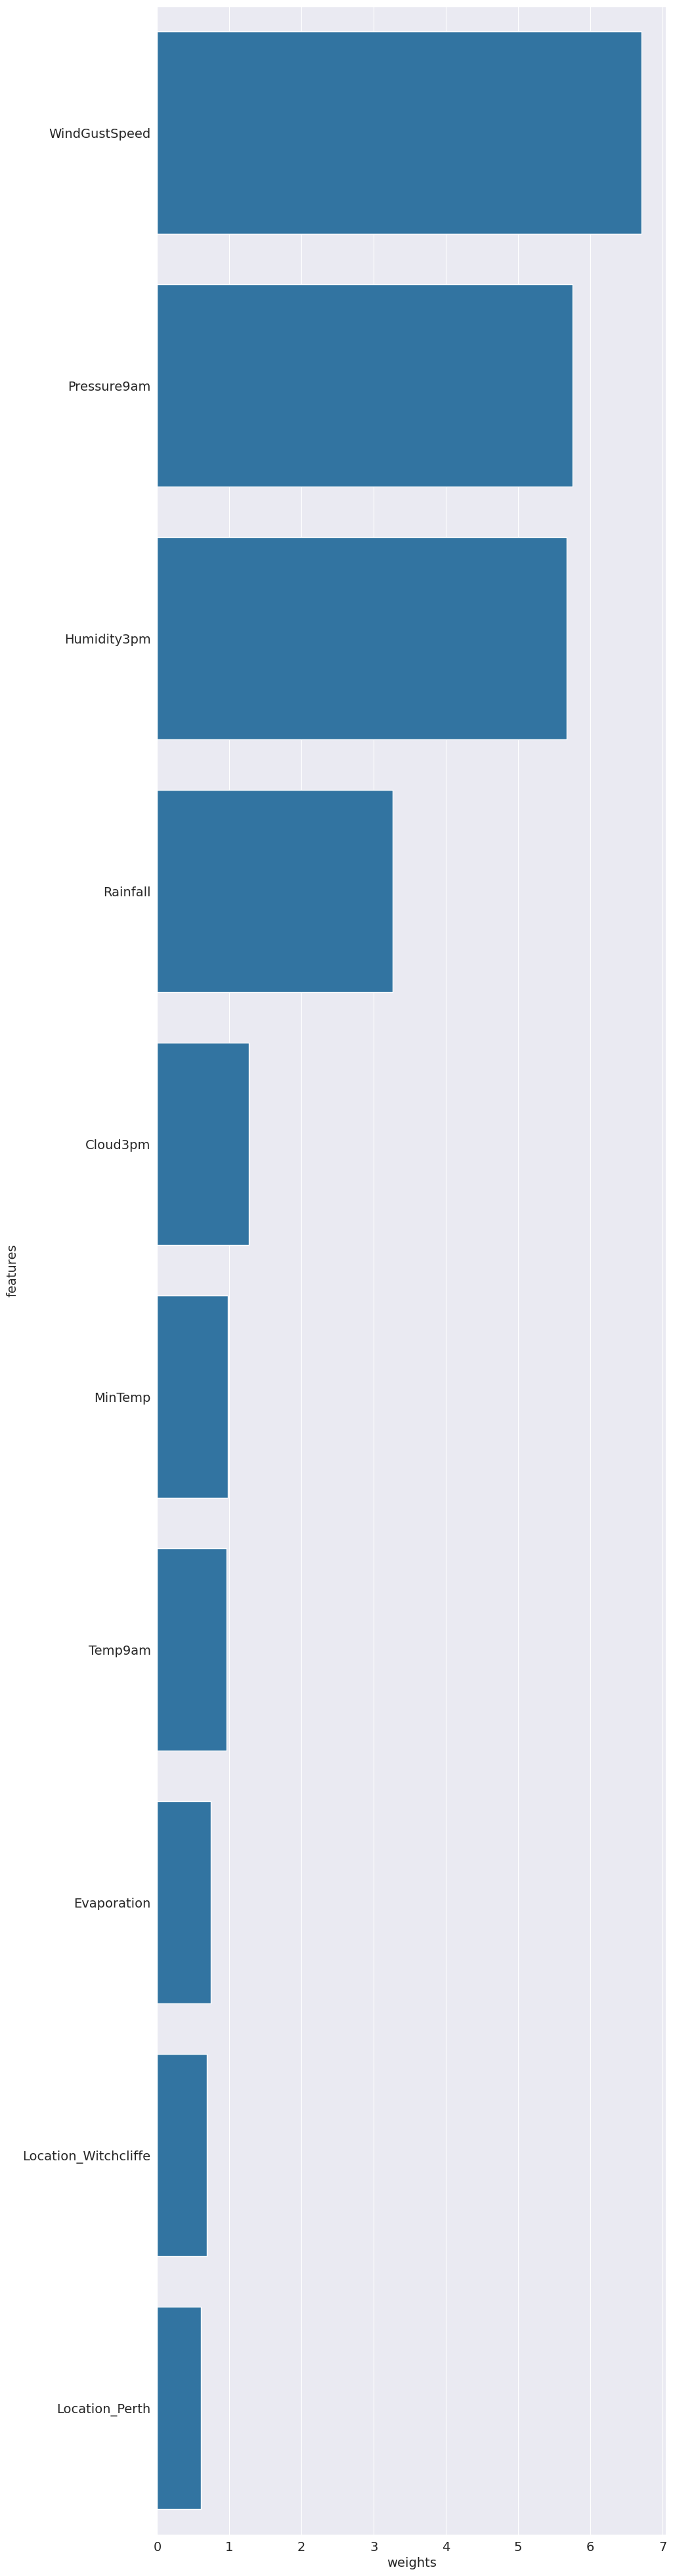

In [349]:
plt.figure(figsize=(10,50))
sns.barplot(data=weights_df.sort_values(by='weights',ascending=False).head(10),x='weights',y='features')

In [350]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [351]:
train_preds=model.predict(X_train)

In [352]:
from sklearn.metrics import accuracy_score

In [353]:
accuracy_score(train_targets,train_preds)

0.8519002326815528

In [354]:
model.predict_proba(X_train)

array([[0.93950706, 0.06049294],
       [0.94333135, 0.05666865],
       [0.95980411, 0.04019589],
       ...,
       [0.98729966, 0.01270034],
       [0.98357986, 0.01642014],
       [0.87598699, 0.12401301]])

In [355]:
from sklearn.metrics import confusion_matrix

In [356]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [357]:
def predict_plot(inputs,targets,name=''):
  preds=model.predict(inputs)
  print("Accuracy : ",round((accuracy_score(targets,preds))*100),"%")
  cf=confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion matrix "+name)
  plt.show()
  return preds

Accuracy :  85 %


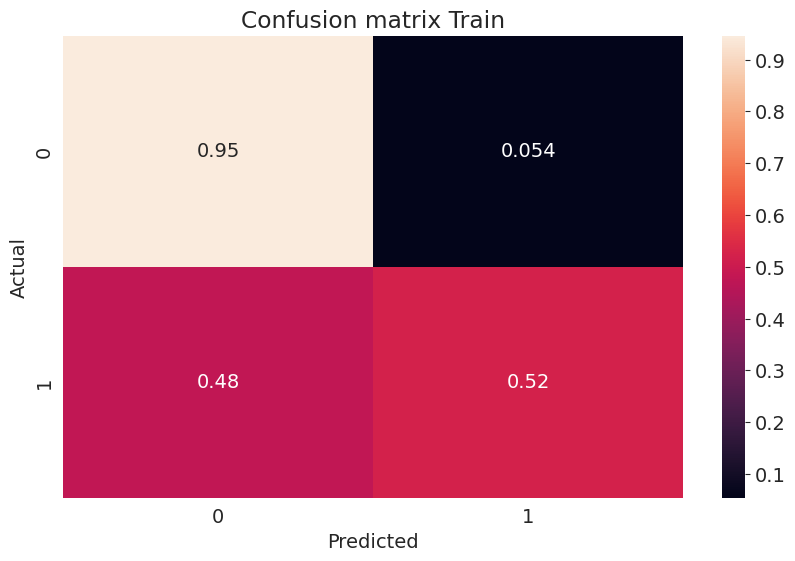

In [358]:
preds_train=predict_plot(X_train,train_targets,'Train')

Accuracy :  85 %


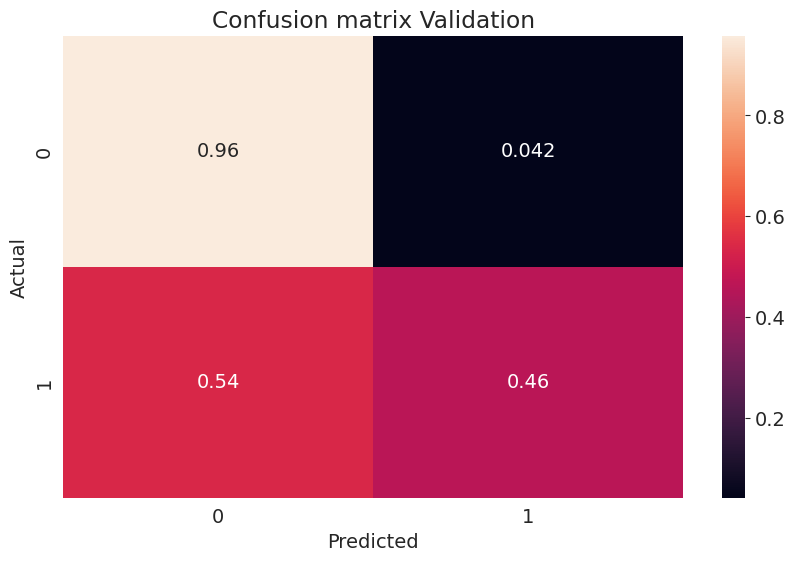

In [359]:
preds_val=predict_plot(X_val,val_targets,'Validation')

Accuracy :  84 %


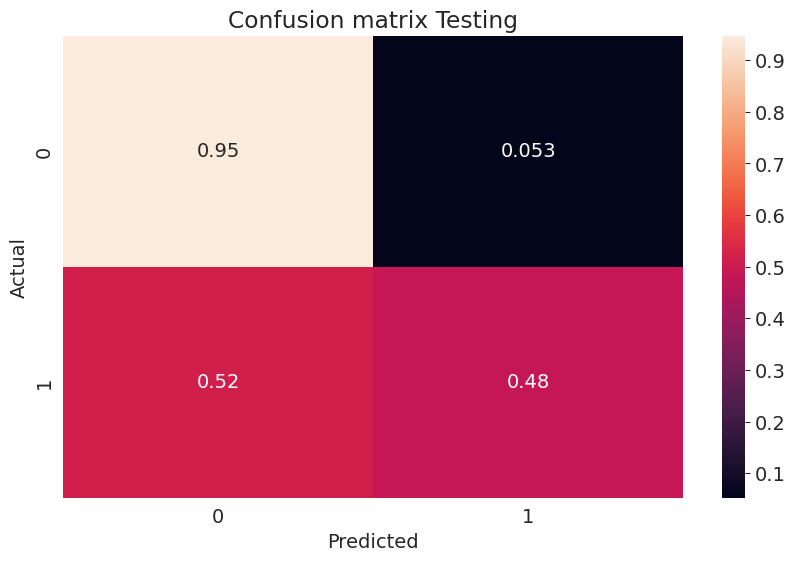

In [360]:
preds_test=predict_plot(X_test,test_targets,'Testing')

In [378]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'No'}

In [379]:
new_input_df=pd.DataFrame([new_input])

In [380]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols]=encoder.transform(new_input_df[catogoric_columns])

<ipython-input-380-7488efc65b78>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-380-7488efc65b78>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-380-7488efc65b78>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-380-7488efc65b78>:3: PerformanceWarning:

In [381]:
X_new_input=new_input_df[numeric_cols+encoded_cols]

In [382]:
print(model.predict(X_new_input))

['No']


In [383]:
def predict_rain(new_input):
  new_input_df=pd.DataFrame([new_input])
  new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
  new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
  new_input_df[encoded_cols]=encoder.transform(new_input_df[catogoric_columns])
  X_new_input=new_input_df[numeric_cols+encoded_cols]
  print("Rain Tomorrow : " ,model.predict(X_new_input))

In [384]:
predict_rain(new_input)

Rain Tomorrow :  ['No']


<ipython-input-383-0351fd7e2300>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-383-0351fd7e2300>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-383-0351fd7e2300>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-383-0351fd7e2300>:5: PerformanceWarning:

In [385]:
import joblib

In [388]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': catogoric_columns,
    'encoded_cols': encoded_cols
}

In [390]:
joblib.dump(aussie_rain,'aussie_rain.joblib')

['aussie_rain.joblib']

In [391]:
project=joblib.load('aussie_rain.joblib')

In [394]:
project['encoder']

OneHotEncoder(handle_unknown='ignore', sparse_output=False)